# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_excel('concrete_dataset.xlsx')

data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'Concrete compressive strength(MPa, megapascals)'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## ### 5.3. Feature Scaling

# 6. Model Creation

## 6.1. Setting Parameters

In [11]:
reg = DecisionTreeRegressor(max_depth=5)

## 6.2. Train Model

In [12]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

## 6.3. Model's Rules

In [13]:
r = export_text(reg, feature_names=list(X_train.columns))

In [14]:
print(r)

|--- Age (day) <= 21.00
|   |--- Cement (component 1)(kg in a m^3 mixture) <= 354.50
|   |   |--- Age (day) <= 10.50
|   |   |   |--- Cement (component 1)(kg in a m^3 mixture) <= 255.25
|   |   |   |   |--- Cement (component 1)(kg in a m^3 mixture) <= 155.00
|   |   |   |   |   |--- value: [8.04]
|   |   |   |   |--- Cement (component 1)(kg in a m^3 mixture) >  155.00
|   |   |   |   |   |--- value: [14.15]
|   |   |   |--- Cement (component 1)(kg in a m^3 mixture) >  255.25
|   |   |   |   |--- Blast Furnace Slag (component 2)(kg in a m^3 mixture) <= 197.20
|   |   |   |   |   |--- value: [18.17]
|   |   |   |   |--- Blast Furnace Slag (component 2)(kg in a m^3 mixture) >  197.20
|   |   |   |   |   |--- value: [31.96]
|   |   |--- Age (day) >  10.50
|   |   |   |--- Superplasticizer (component 5)(kg in a m^3 mixture) <= 7.81
|   |   |   |   |--- Blast Furnace Slag (component 2)(kg in a m^3 mixture) <= 46.07
|   |   |   |   |   |--- value: [21.90]
|   |   |   |   |--- Blast Furnace Sl

# 7. Prediction

## 7.1. Training Set

In [15]:
y_pred_train = reg.predict(X_train)

In [16]:
y_pred_train

array([40.49251436, 61.54925389, 31.42083142, 24.83186118, 18.17419566,
       21.9008221 , 31.42083142, 31.42083142, 40.49251436, 28.34065817,
       40.49251436, 31.42083142, 40.49251436, 31.42083142, 14.1521225 ,
       53.48931265, 40.49251436,  8.03873858, 14.1521225 , 40.49251436,
       61.54925389, 18.17419566, 31.95797868, 33.36678808, 13.53612115,
       18.17419566, 40.49251436, 53.48931265, 31.42083142, 40.49251436,
       42.47531355, 31.42083142, 28.34065817, 31.42083142, 37.40789959,
       40.49251436, 31.42083142, 61.54925389, 31.42083142, 31.42083142,
       62.31599001, 14.1521225 , 61.54925389, 31.42083142, 18.17419566,
       28.34065817, 14.1521225 , 31.42083142, 33.36678808, 14.1521225 ,
       14.1521225 , 31.42083142, 49.11296237, 18.17419566, 40.49251436,
       40.86524252, 14.1521225 , 14.1521225 , 61.54925389, 76.22846656,
        8.03873858, 31.42083142, 49.11296237, 14.1521225 , 21.9008221 ,
       14.1521225 , 40.49251436, 14.1521225 , 40.49251436, 13.53

## 7.2. Test Set

In [17]:
y_pred_test = reg.predict(X_test)

In [18]:
y_pred_test

array([40.49251436, 61.54925389, 14.1521225 , 38.66473062, 28.34065817,
       31.42083142, 41.57424054, 49.83568643, 14.1521225 , 37.40789959,
       31.42083142, 13.53612115, 61.54925389, 42.47531355, 31.42083142,
       49.11296237, 31.42083142, 53.48931265, 53.48931265, 46.48722982,
       13.53612115, 61.54925389, 31.42083142, 41.57424054, 14.1521225 ,
       41.57424054, 42.47531355, 14.1521225 , 40.49251436, 33.36678808,
       31.42083142, 53.48931265, 31.42083142, 18.17419566, 31.42083142,
       61.54925389, 21.9008221 , 42.47531355, 21.9008221 , 40.49251436,
       61.54925389, 61.54925389, 14.1521225 , 42.47531355, 24.83186118,
       40.49251436, 42.47531355, 28.34065817, 53.48931265, 40.49251436,
       13.53612115, 33.36678808,  8.03873858, 37.40789959, 42.47531355,
       31.42083142, 37.95220642, 14.1521225 , 28.34065817, 31.42083142,
       42.47531355, 33.36678808, 36.3497263 , 53.48931265, 40.49251436,
       49.83568643, 49.83568643, 42.47531355, 53.48931265, 40.49

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [19]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.8152175575959879
mean_squared_error =		 50.35574287401726
mean_absolute_error =		 5.487625092672867
mean_absolute_percentage_error = 0.1932668661651823


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

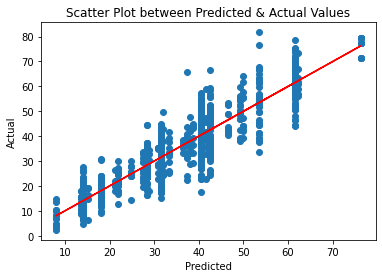

In [20]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [21]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.7049366649726467
mean_squared_error =		 89.19256752269014
mean_absolute_error =		 7.226491942840475
mean_absolute_percentage_error = 0.23522926120769685


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

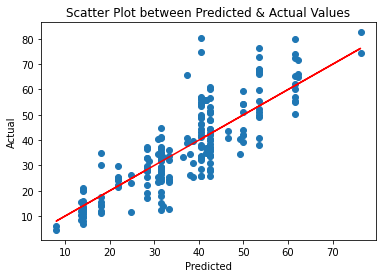

In [22]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [23]:
import pickle

In [24]:
pickle.dump((reg, 
             feature_name),  open('regression_tree_model.pickle', 'wb'))